In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from helper import get_mi_score
%matplotlib inline

In [13]:
plt.rcParams['axes.grid'] = True

In [14]:
telecom_data = pd.read_csv(r"C:\Users\kidus\synergyTelecom\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

*"Fix" the TotalCharges columns*

In [15]:
# Since customers with no tenure have no TotalCharges, we will fill the respective cells with 0 instead of an empty string.
no_tenure = telecom_data[telecom_data.tenure == 0]   

total_charges_filled = telecom_data[telecom_data.index.isin(no_tenure.index)].copy()  # select from the original dataframe whose index is in the "no_tenure" dataframe.
total_charges_filled["TotalCharges"] = 0  

telecom_data.update(total_charges_filled)
telecom_data["TotalCharges"] = telecom_data["TotalCharges"].astype(float)

*KDE to show the relationship between tenure and churn*

<Axes: title={'center': 'Kernel Density Estimate of tenure for Churned vs Unchurned customers'}, xlabel='Tenure (months)', ylabel='Density'>

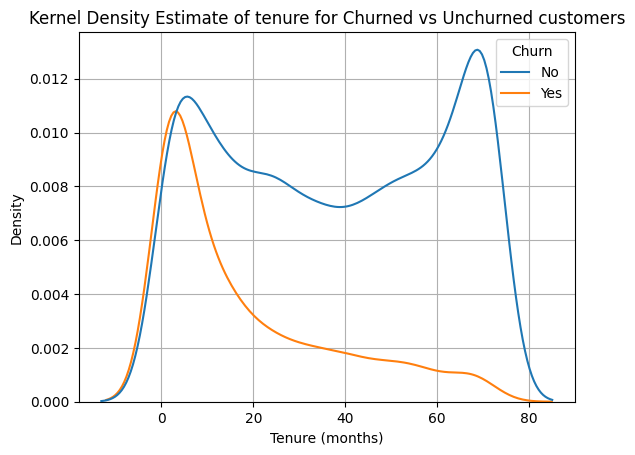

In [16]:
plt.title("Kernel Density Estimate of tenure for Churned vs Unchurned customers")
plt.xlabel("Tenure (months)")
sns.kdeplot(data = telecom_data,  x = "tenure", hue = "Churn", fill = False)

*Illustrate the relationship between contract type and churn*

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

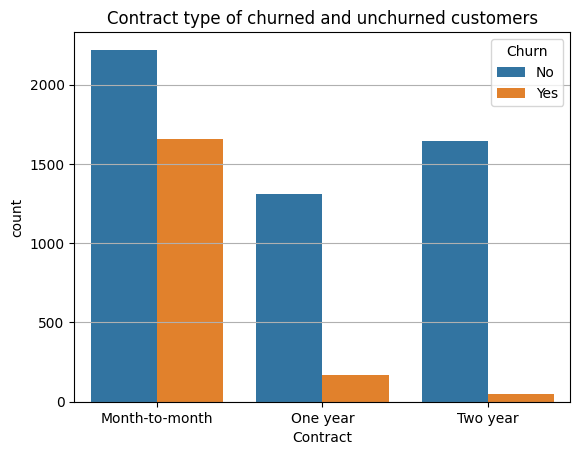

In [17]:
plt.title("Contract type of churned and unchurned customers")
sns.countplot(data = telecom_data, x = "Contract", hue = "Churn")
telecom_data.Contract.value_counts()

*Monthly Charges for churned and unchurned customers*

In [ ]:
plt.xlabel("Monthly charges")
sns.kdeplot(data = telecom_data, x = "MonthlyCharges", hue = "Churn")

# The plot shows MonthlyCharge isn't, on its own, discriminative.  

<Axes: xlabel='SeniorCitizen', ylabel='Density'>

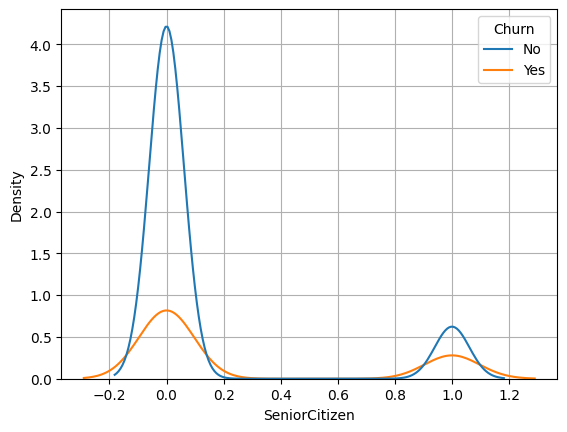

In [46]:
sns.kdeplot(data = telecom_data, x = "SeniorCitizen", hue = "Churn")

In [ ]:
y = telecom_data["Churn"].map({"Yes": 1, "No":0})
X = telecom_data.drop("Churn", axis = 1)

only_nums_X = X.select_dtypes(include= "number")

dtype('int64')

In [39]:
num_features = only_nums_X.dtypes == float | int
get_mi_score(only_nums_X, y, discrete_features= num_features)

SeniorCitizen     0.018848
tenure            0.081285
MonthlyCharges    0.046956
TotalCharges      0.043549
Name: MI score, dtype: float64